In [18]:
import random
from deap import base, creator, tools, algorithms

In [19]:
# Define a maximization problem (maximize sum of bits)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [20]:
toolbox = base.Toolbox()

# Attribute generator: randomly choose 0 or 1
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
IND_SIZE = 10  # Number of bits
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function: count number of 1s
def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [21]:
def main():
    random.seed(42)

    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", lambda x: sum(f[0] for f in x) / len(x))
    stats.register("max", lambda x: max(f[0] for f in x))

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                   ngen=20, stats=stats, halloffame=hof, verbose=True)

    print("Best individual:", hof[0])
    print("Fitness:", hof[0].fitness.values[0])
    
    return log


In [22]:
import matplotlib.pyplot as plt

def plot_stats(log):
    gen = log.select("gen")
    avg = log.select("avg")
    max_ = log.select("max")

    plt.plot(gen, avg, label="Average Fitness")
    plt.plot(gen, max_, label="Max Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.grid(True)
    plt.title("Fitness Evolution")
    plt.show()

# After `main()`, you can extract the logbook and plot it
# If you saved `log` from algorithms.eaSimple in `main()`, pass it here:
# plot_stats(log)


gen	nevals	avg 	max
0  	50    	4.78	8  
1  	41    	6.24	8  
2  	22    	7.08	9  
3  	27    	7.58	10 
4  	25    	8.12	9  
5  	28    	8.56	10 
6  	37    	8.98	10 
7  	24    	9.42	10 
8  	38    	9.78	10 
9  	37    	9.9 	10 
10 	33    	9.88	10 
11 	20    	9.92	10 
12 	24    	9.9 	10 
13 	24    	9.92	10 
14 	39    	9.82	10 
15 	30    	9.9 	10 
16 	29    	9.88	10 
17 	28    	9.94	10 
18 	27    	9.82	10 
19 	35    	9.9 	10 
20 	26    	9.92	10 
Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 10.0


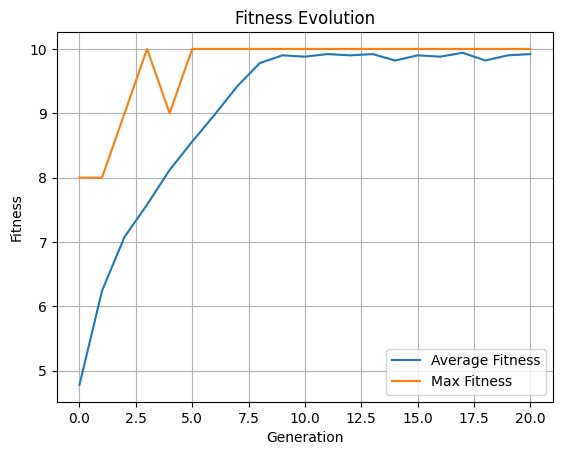

In [23]:
log = main()
plot_stats(log)


In [ ]:
'''
DEAP stands for Distributed Evolutionary Algorithms in Python.

It is a powerful, flexible, and easy-to-use Python framework for implementing evolutionary algorithms (EAs) and metaheuristic optimization techniques.

🚀 Key Features: ✅ Supports major evolutionary methods:

Genetic Algorithms (GA)

Genetic Programming (GP)

Evolution Strategies (ES)

Particle Swarm Optimization (PSO)

✅ Customizable operators (crossover, mutation, selection)

✅ Parallel and distributed computing support

✅ Statistical tracking and visualization support

✅ Easy integration with NumPy, SciPy, sklearn, etc.
'''